In [1]:
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from scipy import interp
from sklearn.metrics import roc_curve, auc
from numpy import argmax
from sklearn.metrics import precision_recall_curve, average_precision_score
from xgboost import XGBClassifier
import xgboost as xgb
from joblib import dump


# DATA


# clustered examples

In [6]:
folder = "/home/clau/Escritorio/Doctorado/microbiota_interaction/kmeans/metodo4/"
testF1=pd.read_table(folder + "Test_F0.tsv")
testF2=pd.read_table(folder + "Test_F1.tsv")
testF3=pd.read_table(folder + "Test_F2.tsv")
testF4=pd.read_table(folder + "Test_F3.tsv")

trainF1=pd.read_table(folder + "Train_F0.tsv")
trainF2=pd.read_table(folder + "Train_F1.tsv")
trainF3=pd.read_table(folder + "Train_F2.tsv")
trainF4=pd.read_table(folder + "Train_F3.tsv")


#KNN set k, metric and weights on one fold (2)

In [7]:
#to visualize performance
accuracy =  np.zeros((4, 31))
error =  np.zeros((4, 31))
#all data 


In [9]:
all_data = pd.read_csv("/home/clau/Escritorio/Doctorado/microbiota_interaction/kmeans/metodo4/all_data.tsv", sep="\s+")
tenpercent = all_data.sample(frac=0.1, replace=False, random_state=8).reset_index(drop=True)
print(len(tenpercent))
X = tenpercent.iloc [:, 1:6282].values
y = tenpercent.iloc[:, 0].values
print(y)

265
[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0
 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 0 1 1]


In [10]:
#ten percent of data, cosine, weighted by distance
#33% of examples to test


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=1) 


print("K\tAccuracy\terror")
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine', 
                               weights='distance',algorithm='brute')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)     
    accuracy[0,k] = metrics.accuracy_score(y_test, y_pred)
    error[0,k] = np.mean(y_pred != y_test)
    print(k,"\t",accuracy[0,k], "\t", error[0,k])
    

K	Accuracy	error
1 	 0.7954545454545454 	 0.20454545454545456
2 	 0.7954545454545454 	 0.20454545454545456
3 	 0.8636363636363636 	 0.13636363636363635
4 	 0.8636363636363636 	 0.13636363636363635
5 	 0.875 	 0.125
6 	 0.8522727272727273 	 0.14772727272727273
7 	 0.8181818181818182 	 0.18181818181818182
8 	 0.8181818181818182 	 0.18181818181818182
9 	 0.8181818181818182 	 0.18181818181818182
10 	 0.8068181818181818 	 0.19318181818181818
11 	 0.8181818181818182 	 0.18181818181818182
12 	 0.8181818181818182 	 0.18181818181818182
13 	 0.8181818181818182 	 0.18181818181818182
14 	 0.8181818181818182 	 0.18181818181818182
15 	 0.8181818181818182 	 0.18181818181818182
16 	 0.8068181818181818 	 0.19318181818181818
17 	 0.8068181818181818 	 0.19318181818181818
18 	 0.7954545454545454 	 0.20454545454545456
19 	 0.7727272727272727 	 0.22727272727272727
20 	 0.7727272727272727 	 0.22727272727272727
21 	 0.7727272727272727 	 0.22727272727272727
22 	 0.7727272727272727 	 0.22727272727272727
23 	 0.

In [11]:
# ten percent of data, cosine, uniform weight


print("K\tAccuracy\terror")
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine', 
                               weights='uniform',algorithm='brute')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)  
    accuracy[1,k] = metrics.accuracy_score(y_test, y_pred)
    error[1,k] = np.mean(y_pred != y_test)
    print(k,"\t",accuracy[1,k], "\t", error[1,k])

K	Accuracy	error
1 	 0.7954545454545454 	 0.20454545454545456
2 	 0.7386363636363636 	 0.26136363636363635
3 	 0.8522727272727273 	 0.14772727272727273
4 	 0.8522727272727273 	 0.14772727272727273
5 	 0.8181818181818182 	 0.18181818181818182
6 	 0.8295454545454546 	 0.17045454545454544
7 	 0.7840909090909091 	 0.2159090909090909
8 	 0.7727272727272727 	 0.22727272727272727
9 	 0.7840909090909091 	 0.2159090909090909
10 	 0.7613636363636364 	 0.23863636363636365
11 	 0.7727272727272727 	 0.22727272727272727
12 	 0.7727272727272727 	 0.22727272727272727
13 	 0.7727272727272727 	 0.22727272727272727
14 	 0.7840909090909091 	 0.2159090909090909
15 	 0.7727272727272727 	 0.22727272727272727
16 	 0.7727272727272727 	 0.22727272727272727
17 	 0.75 	 0.25
18 	 0.7386363636363636 	 0.26136363636363635
19 	 0.7613636363636364 	 0.23863636363636365
20 	 0.75 	 0.25
21 	 0.7727272727272727 	 0.22727272727272727
22 	 0.7613636363636364 	 0.23863636363636365
23 	 0.7727272727272727 	 0.2272727272727

In [120]:
#test, euclidean, weighted by distance


print("K\tAccuracy\terror")
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', 
                               weights='distance',algorithm='brute')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)     
    accuracy[2,k] = metrics.accuracy_score(y_test, y_pred)
    error[2,k] = np.mean(y_pred != y_test)
    print(k,"\t",accuracy[2,k], "\t", error[2,k])

K	Accuracy	error
1 	 0.7840909090909091 	 0.2159090909090909
2 	 0.7840909090909091 	 0.2159090909090909
3 	 0.8068181818181818 	 0.19318181818181818
4 	 0.8181818181818182 	 0.18181818181818182
5 	 0.8181818181818182 	 0.18181818181818182
6 	 0.8181818181818182 	 0.18181818181818182
7 	 0.8068181818181818 	 0.19318181818181818
8 	 0.8181818181818182 	 0.18181818181818182
9 	 0.8181818181818182 	 0.18181818181818182
10 	 0.8068181818181818 	 0.19318181818181818
11 	 0.7840909090909091 	 0.2159090909090909
12 	 0.7954545454545454 	 0.20454545454545456
13 	 0.7613636363636364 	 0.23863636363636365
14 	 0.7840909090909091 	 0.2159090909090909
15 	 0.7727272727272727 	 0.22727272727272727
16 	 0.7727272727272727 	 0.22727272727272727
17 	 0.7727272727272727 	 0.22727272727272727
18 	 0.7840909090909091 	 0.2159090909090909
19 	 0.7727272727272727 	 0.22727272727272727
20 	 0.7613636363636364 	 0.23863636363636365
21 	 0.7840909090909091 	 0.2159090909090909
22 	 0.7727272727272727 	 0.2272

In [121]:
#F test, euclidean, uniform weight

print("K\tAccuracy\terror")
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', 
                               weights='uniform',algorithm='brute')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)    
    accuracy[3,k] = metrics.accuracy_score(y_test, y_pred)
    error[3,k] = np.mean(y_pred != y_test)
    print(k,"\t",accuracy[3,k], "\t", error[3,k])

K	Accuracy	error
1 	 0.7840909090909091 	 0.2159090909090909
2 	 0.7727272727272727 	 0.22727272727272727
3 	 0.7954545454545454 	 0.20454545454545456
4 	 0.8181818181818182 	 0.18181818181818182
5 	 0.7954545454545454 	 0.20454545454545456
6 	 0.7954545454545454 	 0.20454545454545456
7 	 0.7954545454545454 	 0.20454545454545456
8 	 0.7954545454545454 	 0.20454545454545456
9 	 0.7954545454545454 	 0.20454545454545456
10 	 0.7954545454545454 	 0.20454545454545456
11 	 0.7613636363636364 	 0.23863636363636365
12 	 0.7727272727272727 	 0.22727272727272727
13 	 0.7613636363636364 	 0.23863636363636365
14 	 0.7727272727272727 	 0.22727272727272727
15 	 0.7613636363636364 	 0.23863636363636365
16 	 0.7613636363636364 	 0.23863636363636365
17 	 0.7613636363636364 	 0.23863636363636365
18 	 0.7613636363636364 	 0.23863636363636365
19 	 0.7613636363636364 	 0.23863636363636365
20 	 0.75 	 0.25
21 	 0.7727272727272727 	 0.22727272727272727
22 	 0.7727272727272727 	 0.22727272727272727
23 	 0.784

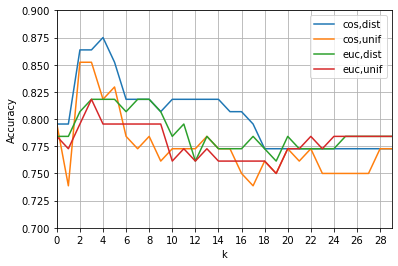

In [129]:
# accuracy[0][0] = accuracy[0][1]
# accuracy[1][0] = accuracy[1][1]
# accuracy[2][0] = accuracy[2][1]
# accuracy[3][0] = accuracy[3][1]
plt.plot(accuracy[0],label='cos,dist')
plt.plot(accuracy[1],label='cos,unif')
plt.plot(accuracy[2],label='euc,dist')
plt.plot(accuracy[3],label='euc,unif')
plt.axis([1, 30, 0.7, 0.9])
x_ax = np.arange(1, 30, 2)
my_xticks = np.arange(0, 30, 2)
plt.xticks(x_ax, my_xticks)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.savefig("setK",dpi=300);
plt.show()

In [5]:
# train KNN, k=3

k=3
y_test = np.empty(0)
y_pred = np.empty(0)
y_prob = []


knn = KNeighborsClassifier(n_neighbors=k, metric='cosine', weights='distance')

#fold1
#X_train1=trainF1.iloc [:, 1:6282].values
#y_train1=trainF1.iloc[:, 0].values
#X_test1=testF1.iloc [:, 1:6282].values
#y_test1=testF1.iloc[:, 0].values

knn.fit(X_train1, y_train1)
dump(knn, 'knn_F1.joblib') 

y_pred1 = knn.predict(X_test1)
y_test = np.concatenate((y_test, y_test1))
y_pred = np.concatenate((y_pred, y_pred1))
y_prob.extend(knn.predict_proba(X_test1))



#fold2
X_train2=trainF2.iloc [:, 1:6282].values
y_train2=trainF2.iloc[:, 0].values
X_test2=testF2.iloc [:, 1:6282].values
y_test2=testF2.iloc[:, 0].values

knn.fit(X_train2, y_train2)
dump(knn, 'knn_F2.joblib') 

y_pred2 = knn.predict(X_test2)
y_test = np.concatenate((y_test, y_test2))
y_pred = np.concatenate((y_pred, y_pred2))
y_prob.extend(knn.predict_proba(X_test2))

#fold3
X_train3=trainF3.iloc [:, 1:6282].values
y_train3=trainF3.iloc[:, 0].values
X_test3=testF3.iloc [:, 1:6282].values
y_test3=testF3.iloc[:, 0].values

knn.fit(X_train3, y_train3)
dump(knn, 'knn_F3.joblib') 

y_pred3 = knn.predict(X_test3)
y_test = np.concatenate((y_test, y_test3))
y_pred = np.concatenate((y_pred, y_pred3))
y_prob.extend(knn.predict_proba(X_test3))

#fold4
X_train4=trainF4.iloc [:, 1:6282].values
y_train4=trainF4.iloc[:, 0].values
X_test4=testF4.iloc [:, 1:6282].values
y_test4=testF4.iloc[:, 0].values

knn.fit(X_train4, y_train4)
dump(knn, 'knn_F4.joblib') 

y_pred4 = knn.predict(X_test4)
y_test = np.concatenate((y_test, y_test4))
y_pred = np.concatenate((y_pred, y_pred4))
y_prob.extend(knn.predict_proba(X_test4))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
    


[[ 401  145]
 [ 130 1976]]
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       546
         1.0       0.93      0.94      0.93      2106

    accuracy                           0.90      2652
   macro avg       0.84      0.84      0.84      2652
weighted avg       0.90      0.90      0.90      2652



# SVM







# Linear

In [6]:

y_testsvml = np.empty(0)
y_predsvml = np.empty(0)
y_probsvml = []

clf = svm.SVC(kernel= 'linear', random_state=1,probability=True)

#F1
clf.fit(X_train1, y_train1) 
dump(clf, 'SVM_F1.joblib') 
y_pred1 = clf.predict(X_test1)
y_predsvml = np.concatenate((y_predsvml, y_pred1))
y_probsvml.extend(clf.predict_proba(X_test1))
#F2
clf.fit(X_train2, y_train2) 
dump(clf, 'SVM_F2.joblib') 
y_pred2 = clf.predict(X_test2)
y_predsvml = np.concatenate((y_predsvml, y_pred2))
y_probsvml.extend(clf.predict_proba(X_test2))
#F3
clf.fit(X_train3, y_train3) 
dump(clf, 'SVM_F3.joblib')
y_pred3 = clf.predict(X_test3)
y_predsvml = np.concatenate((y_predsvml, y_pred3))
y_probsvml.extend(clf.predict_proba(X_test3))
#F4
clf.fit(X_train4, y_train4) 
dump(clf, 'SVM_F4.joblib')
y_pred4 = clf.predict(X_test4)
y_predsvml = np.concatenate((y_predsvml, y_pred4))
y_probsvml.extend(clf.predict_proba(X_test4))

print(confusion_matrix(y_test, y_predsvml))
print(classification_report(y_test, y_predsvml))



[[ 369  177]
 [ 104 2002]]
              precision    recall  f1-score   support

         0.0       0.78      0.68      0.72       546
         1.0       0.92      0.95      0.93      2106

    accuracy                           0.89      2652
   macro avg       0.85      0.81      0.83      2652
weighted avg       0.89      0.89      0.89      2652



# RBF

In [7]:

y_testsvmr = np.empty(0)
y_predsvmr = np.empty(0)
y_probsvmr = []

clf = svm.SVC(kernel= 'rbf', random_state=1,probability=True)

#F1
clf.fit(X_train1, y_train1)
dump(clf, 'RBF_F1.joblib')
y_pred1 = clf.predict(X_test1)
y_predsvmr = np.concatenate((y_predsvmr, y_pred1))
y_probsvmr.extend(clf.predict_proba(X_test1))
#F2
clf.fit(X_train2, y_train2) 
dump(clf, 'RBF_F2.joblib')
y_pred2 = clf.predict(X_test2)
y_predsvmr = np.concatenate((y_predsvmr, y_pred2))
y_probsvmr.extend(clf.predict_proba(X_test2))
#F3
clf.fit(X_train3, y_train3) 
dump(clf, 'RBF_F3.joblib')
y_pred3 = clf.predict(X_test3)
y_predsvmr = np.concatenate((y_predsvmr, y_pred3))
y_probsvmr.extend(clf.predict_proba(X_test3))
#F4
clf.fit(X_train4, y_train4) 
dump(clf, 'RBF_F4.joblib')
y_pred4 = clf.predict(X_test4)
y_predsvmr = np.concatenate((y_predsvmr, y_pred4))
y_probsvmr.extend(clf.predict_proba(X_test4))

print(confusion_matrix(y_test, y_predsvmr))
print(classification_report(y_test, y_predsvmr))


[[ 343  203]
 [ 163 1943]]
              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65       546
         1.0       0.91      0.92      0.91      2106

    accuracy                           0.86      2652
   macro avg       0.79      0.78      0.78      2652
weighted avg       0.86      0.86      0.86      2652



# poly

In [8]:

y_testsvmp = np.empty(0)
y_predsvmp = np.empty(0)
y_probsvmp = []

clf = svm.SVC(kernel= 'poly', random_state=1,probability=True)

#F1
clf.fit(X_train1, y_train1) 
dump(clf, 'poly_F1.joblib')
y_pred1 = clf.predict(X_test1)
y_predsvmp = np.concatenate((y_predsvmp, y_pred1))
y_probsvmp.extend(clf.predict_proba(X_test1))
#F2
clf.fit(X_train2, y_train2) 
dump(clf, 'poly_F2.joblib')
y_pred2 = clf.predict(X_test2)
y_predsvmp = np.concatenate((y_predsvmp, y_pred2))
y_probsvmp.extend(clf.predict_proba(X_test2))
#F3
clf.fit(X_train3, y_train3) 
dump(clf, 'poly_F3.joblib')
y_pred3 = clf.predict(X_test3)
y_predsvmp = np.concatenate((y_predsvmp, y_pred3))
y_probsvmp.extend(clf.predict_proba(X_test3))
#F4
clf.fit(X_train4, y_train4) 
dump(clf, 'poly_F4.joblib')
y_pred4 = clf.predict(X_test4)
y_predsvmp = np.concatenate((y_predsvmp, y_pred4))
y_probsvmp.extend(clf.predict_proba(X_test4))

print(confusion_matrix(y_test, y_predsvmp))
print(classification_report(y_test, y_predsvmp))


[[ 376  170]
 [ 140 1966]]
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71       546
         1.0       0.92      0.93      0.93      2106

    accuracy                           0.88      2652
   macro avg       0.82      0.81      0.82      2652
weighted avg       0.88      0.88      0.88      2652



# sigmoid

In [9]:

y_testsvms = np.empty(0)
y_predsvms = np.empty(0)
y_probsvms = []

clf = svm.SVC(kernel= 'sigmoid', random_state=1,probability=True)

#F1
clf.fit(X_train1, y_train1) 
dump(clf, 'sigmoid_F1.joblib')
y_pred1 = clf.predict(X_test1)
y_predsvms = np.concatenate((y_predsvms, y_pred1))
y_probsvms.extend(clf.predict_proba(X_test1))
#F2
clf.fit(X_train2, y_train2) 
dump(clf, 'sigmoid_F2.joblib')
y_pred2 = clf.predict(X_test2)
y_predsvms = np.concatenate((y_predsvms, y_pred2))
y_probsvms.extend(clf.predict_proba(X_test2))
#F3
clf.fit(X_train3, y_train3) 
dump(clf, 'sigmoid_F3.joblib')
y_pred3 = clf.predict(X_test3)
y_predsvms = np.concatenate((y_predsvms, y_pred3))
y_probsvms.extend(clf.predict_proba(X_test3))
#F4
clf.fit(X_train4, y_train4) 
dump(clf, 'sigmoid_F4.joblib')
y_pred4 = clf.predict(X_test4)
y_predsvms = np.concatenate((y_predsvms, y_pred4))
y_probsvms.extend(clf.predict_proba(X_test4))

print(confusion_matrix(y_test, y_predsvms))
print(classification_report(y_test, y_predsvms))

[[ 158  388]
 [ 176 1930]]
              precision    recall  f1-score   support

         0.0       0.47      0.29      0.36       546
         1.0       0.83      0.92      0.87      2106

    accuracy                           0.79      2652
   macro avg       0.65      0.60      0.62      2652
weighted avg       0.76      0.79      0.77      2652



# XGBoost

In [10]:

y_testxgb = np.empty(0)
y_predxgb = np.empty(0)
y_probxgb = []


model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

#F1
model.fit(X_train1, y_train1)
dump(model, 'XGBoost_F1.joblib')
y_pred1 = model.predict(X_test1)
y_predxgb = np.concatenate((y_predxgb, y_pred1))
y_probxgb.extend(model.predict_proba(X_test1))
#F2
model.fit(X_train2, y_train2)
dump(model, 'XGBoost_F2.joblib')
y_pred2 = model.predict(X_test2)
y_predxgb = np.concatenate((y_predxgb, y_pred2))
y_probxgb.extend(model.predict_proba(X_test2))
#F3
model.fit(X_train3, y_train3)
dump(model, 'XGBoost_F3.joblib')
y_pred3 = model.predict(X_test3)
y_predxgb = np.concatenate((y_predxgb, y_pred3))
y_probxgb.extend(model.predict_proba(X_test3))
#F4
model.fit(X_train4, y_train4)
dump(model, 'XGBoost_F4.joblib')
y_pred4 = model.predict(X_test4)
y_predxgb = np.concatenate((y_predxgb, y_pred4))
y_probxgb.extend(model.predict_proba(X_test4))


print(confusion_matrix(y_test, y_predxgb))
print(classification_report(y_test, y_predxgb))

[[ 445  101]
 [  80 2026]]
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83       546
         1.0       0.95      0.96      0.96      2106

    accuracy                           0.93      2652
   macro avg       0.90      0.89      0.89      2652
weighted avg       0.93      0.93      0.93      2652



# Random Forest

In [11]:

y_testrf = np.empty(0)
y_predrf = np.empty(0)
y_probrf = []


rf = RandomForestClassifier(random_state=1,n_estimators=10000)

#F1
rf.fit(X_train1, y_train1)
dump(rf, 'RF_F1.joblib')
y_pred1 = rf.predict(X_test1)
y_predrf = np.concatenate((y_predrf, y_pred1))
y_probrf.extend(rf.predict_proba(X_test1))
#F2
rf.fit(X_train2, y_train2)
dump(rf, 'RF_F2.joblib')
y_pred2 = rf.predict(X_test2)
y_predrf = np.concatenate((y_predrf, y_pred2))
y_probrf.extend(rf.predict_proba(X_test2))
#F3
rf.fit(X_train3, y_train3)
dump(rf, 'RF_F3.joblib')
y_pred3 = rf.predict(X_test3)
y_predrf = np.concatenate((y_predrf, y_pred3))
y_probrf.extend(rf.predict_proba(X_test3))
#F4
rf.fit(X_train4, y_train4)
dump(rf, 'RF_F4.joblib')
y_pred4 = rf.predict(X_test4)
y_predrf = np.concatenate((y_predrf, y_pred4))
y_probrf.extend(rf.predict_proba(X_test4))

print(confusion_matrix(y_test, y_predrf))
print(classification_report(y_test, y_predrf))

[[ 429  117]
 [ 119 1987]]
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       546
         1.0       0.94      0.94      0.94      2106

    accuracy                           0.91      2652
   macro avg       0.86      0.86      0.86      2652
weighted avg       0.91      0.91      0.91      2652



# ROC curve knn



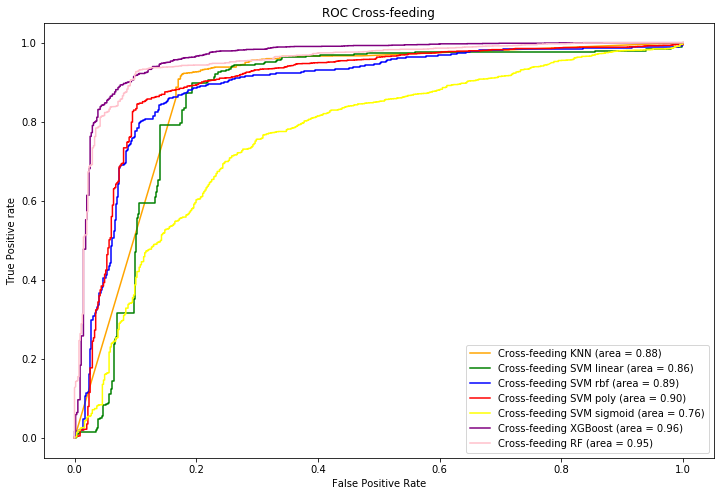

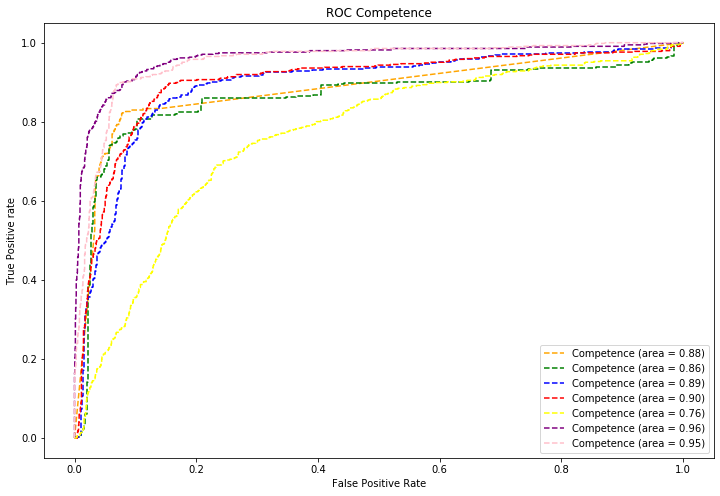

In [16]:
##Plot roc
n_class=2
fpr={}
tpr={}
roc_auc={}
thresh={}
yprob = np.array(y_prob)
fprsvml={}
tprsvml={}
roc_aucsvml={}
threshsvml={}
yprobsvml = np.array(y_probsvml)
fprsvmr={}
tprsvmr={}
roc_aucsvmr={}
threshsvmr={}
yprobsvmr = np.array(y_probsvmr)
fprsvmp={}
tprsvmp={}
roc_aucsvmp={}
threshsvmp={}
yprobsvmp = np.array(y_probsvmp)
fprsvms={}
tprsvms={}
roc_aucsvms={}
threshsvms={}
yprobsvms = np.array(y_probsvms)
fprxgb={}
tprxgb={}
roc_aucxgb={}
threshxgb={}
yprobxgb = np.array(y_probxgb)
fprrf={}
tprrf={}
roc_aucrf={}
threshrf={}
yprobrf = np.array(y_probrf)

##Para cada i en rango 0, 1 calculo el fpr y el tpr, tambien calculo auc por clase
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, yprob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    fprsvml[i], tprsvml[i], threshsvml[i] = roc_curve(y_test, yprobsvml[:,i], pos_label=i)
    roc_aucsvml[i] = auc(fprsvml[i], tprsvml[i])
    fprsvmr[i], tprsvmr[i], threshsvmr[i] = roc_curve(y_test, yprobsvmr[:,i], pos_label=i)
    roc_aucsvmr[i] = auc(fprsvmr[i], tprsvmr[i])
    fprsvmp[i], tprsvmp[i], threshsvmp[i] = roc_curve(y_test, yprobsvmp[:,i], pos_label=i)
    roc_aucsvmp[i] = auc(fprsvmp[i], tprsvmp[i])
    fprsvms[i], tprsvms[i], threshsvms[i] = roc_curve(y_test, yprobsvms[:,i], pos_label=i)
    roc_aucsvms[i] = auc(fprsvms[i], tprsvms[i])
    fprxgb[i], tprxgb[i], threshxgb[i] = roc_curve(y_test, yprobxgb[:,i], pos_label=i)
    roc_aucxgb[i] = auc(fprxgb[i], tprxgb[i])
    fprrf[i], tprrf[i], threshrf[i] = roc_curve(y_test, yprobrf[:,i], pos_label=i)
    roc_aucrf[i] = auc(fprrf[i], tprrf[i])

plt.figure(figsize=(12, 8))
# plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Competence (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-',color='orange', label='Cross-feeding KNN (area = %0.2f)' % roc_auc[1])

# plt.plot(fprsvml[0], tprsvml[0], linestyle='--',color='green', label='Competence (area = %0.2f)' % roc_aucsvml[0])
plt.plot(fprsvml[1], tprsvml[1], linestyle='-',color='green', label='Cross-feeding SVM linear (area = %0.2f)' % roc_aucsvml[1])

# plt.plot(fprsvmr[0], tprsvmr[0], linestyle='--',color='blue', label='Competence (area = %0.2f)' % roc_aucsvmr[0])
plt.plot(fprsvmr[1], tprsvmr[1], linestyle='-',color='blue', label='Cross-feeding SVM rbf (area = %0.2f)' % roc_aucsvmr[1])

# plt.plot(fprsvmp[0], tprsvmp[0], linestyle='--',color='red', label='Competence (area = %0.2f)' % roc_aucsvmp[0])
plt.plot(fprsvmp[1], tprsvmp[1], linestyle='-',color='red', label='Cross-feeding SVM poly (area = %0.2f)' % roc_aucsvmp[1])

# plt.plot(fprsvms[0], tprsvms[0], linestyle='--',color='yellow', label='Competence (area = %0.2f)' % roc_aucsvms[0])
plt.plot(fprsvms[1], tprsvms[1], linestyle='-',color='yellow', label='Cross-feeding SVM sigmoid (area = %0.2f)' % roc_aucsvms[1])

# plt.plot(fprxgb[0], tprxgb[0], linestyle='--',color='purple', label='Competence (area = %0.2f)' % roc_aucxgb[0])
plt.plot(fprxgb[1], tprxgb[1], linestyle='-',color='purple', label='Cross-feeding XGBoost (area = %0.2f)' % roc_aucxgb[1])

# plt.plot(fprrf[0], tprrf[0], linestyle='--',color='pink', label='Competence (area = %0.2f)' % roc_aucrf[0])
plt.plot(fprrf[1], tprrf[1], linestyle='-',color='pink', label='Cross-feeding RF (area = %0.2f)' % roc_aucrf[1])

plt.title("ROC Cross-feeding")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.savefig("ROC CF",dpi=300);


plt.figure(figsize=(12, 8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Competition KNN (area = %0.2f)' % roc_auc[0])
#plt.plot(fpr[1], tpr[1], linestyle='-',color='orange', label='Cross-feeding KNN (area = %0.2f)' % roc_auc[1])

plt.plot(fprsvml[0], tprsvml[0], linestyle='--',color='green', label='Competition SVM linear (area = %0.2f)' % roc_aucsvml[0])
#plt.plot(fprsvml[1], tprsvml[1], linestyle='-',color='green', label='Cross-feeding SVM linear (area = %0.2f)' % roc_aucsvml[1])

plt.plot(fprsvmr[0], tprsvmr[0], linestyle='--',color='blue', label='Competence (area = %0.2f)' % roc_aucsvmr[0])
#plt.plot(fprsvmr[1], tprsvmr[1], linestyle='-',color='blue', label='Cross-feeding SVM rbf (area = %0.2f)' % roc_aucsvmr[1])

plt.plot(fprsvmp[0], tprsvmp[0], linestyle='--',color='red', label='Competition SVM poly (area = %0.2f)' % roc_aucsvmp[0])
#plt.plot(fprsvmp[1], tprsvmp[1], linestyle='-',color='red', label='Cross-feeding SVM poly (area = %0.2f)' % roc_aucsvmp[1])

plt.plot(fprsvms[0], tprsvms[0], linestyle='--',color='yellow', label='Competition SVM sigmoid (area = %0.2f)' % roc_aucsvms[0])
#plt.plot(fprsvms[1], tprsvms[1], linestyle='-',color='yellow', label='Cross-feeding SVM sigmoid (area = %0.2f)' % roc_aucsvms[1])

plt.plot(fprxgb[0], tprxgb[0], linestyle='--',color='purple', label='Competition XGBoost (area = %0.2f)' % roc_aucxgb[0])
#plt.plot(fprxgb[1], tprxgb[1], linestyle='-',color='purple', label='Cross-feeding XGBoost (area = %0.2f)' % roc_aucxgb[1])

plt.plot(fprrf[0], tprrf[0], linestyle='--',color='pink', label='Competition RF (area = %0.2f)' % roc_aucrf[0])
#plt.plot(fprrf[1], tprrf[1], linestyle='-',color='pink', label='Cross-feeding RF (area = %0.2f)' % roc_aucrf[1])


plt.title("ROC Competition")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.savefig("ROCcomp",dpi=300);



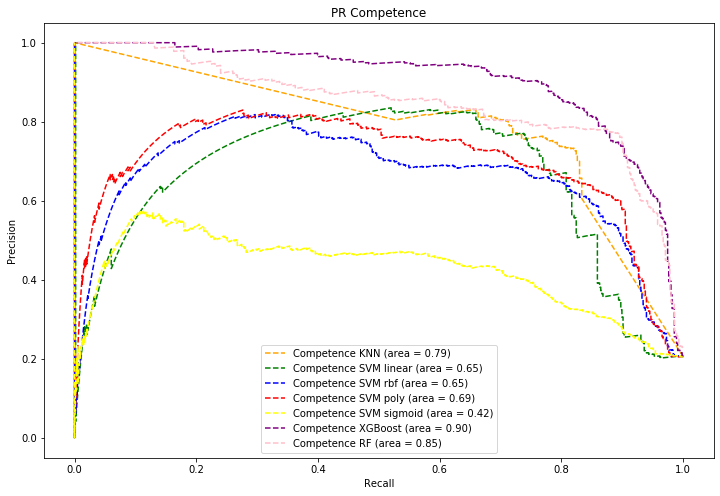

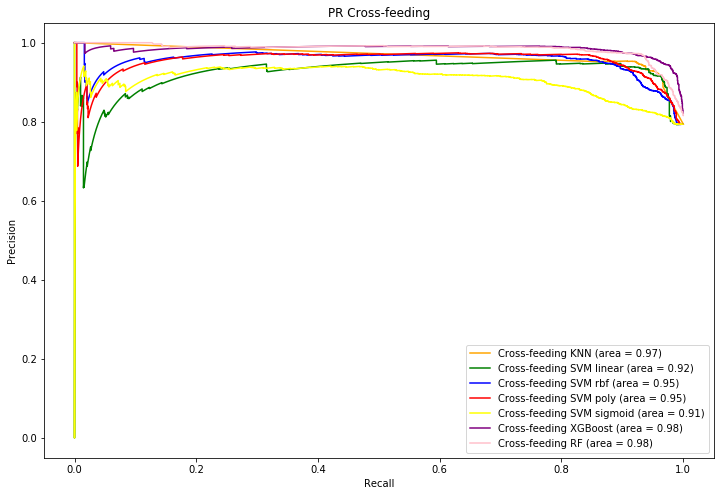

In [15]:
#calculate precision and recall
p={}
r={}
pr_auc={}
thres={}
psvml={}
rsvml={}
pr_aucsvml={}
thressvml={}
psvmr={}
rsvmr={}
pr_aucsvmr={}
thressvmr={}
psvmp={}
rsvmp={}
pr_aucsvmp={}
threshsvmp={}
psvms={}
rsvms={}
pr_aucsvms={}
threshsvms={}
pxgb={}
rxgb={}
pr_aucxgb={}
threshxgb={}
prf={}
rrf={}
pr_aucrf={}
threshrf={}

##calculate p & r.
for i in range(n_class):    
    p[i], r[i], thres[i] = precision_recall_curve(y_test, yprob[:,i], pos_label=i)
    pr_auc[i]=auc(r[i], p[i])
    psvml[i], rsvml[i], thressvml[i] = precision_recall_curve(y_test, yprobsvml[:,i], pos_label=i)
    pr_aucsvml[i]=auc(rsvml[i], psvml[i])
    psvmr[i], rsvmr[i], thressvmr[i] = precision_recall_curve(y_test, yprobsvmr[:,i], pos_label=i)
    pr_aucsvmr[i]=auc(rsvmr[i], psvmr[i])
    psvmp[i], rsvmp[i], threshsvmp[i] = precision_recall_curve(y_test, yprobsvmp[:,i], pos_label=i)
    pr_aucsvmp[i] = auc(rsvmp[i], psvmp[i])
    psvms[i], rsvms[i], threshsvms[i] = precision_recall_curve(y_test, yprobsvms[:,i], pos_label=i)
    pr_aucsvms[i] = auc(rsvms[i], psvms[i])
    pxgb[i], rxgb[i], threshxgb[i] = precision_recall_curve(y_test, yprobxgb[:,i], pos_label=i)
    pr_aucxgb[i] = auc(rxgb[i], pxgb[i])
    prf[i], rrf[i], threshrf[i] = precision_recall_curve(y_test, yprobrf[:,i], pos_label=i)
    pr_aucrf[i] = auc(rrf[i], prf[i])
    
plt.figure(figsize=(12, 8))
plt.plot(r[0], p[0], linestyle='--',color='orange', label='Competition KNN (area = %0.2f)' % pr_auc[0])
# plt.plot(r[1], p[1], linestyle='-',color='orange', label='Cross-feeding KNN (area = %0.2f)' % pr_auc[1])

plt.plot(rsvml[0], psvml[0], linestyle='--',color='green', label='Competition SVM linear (area = %0.2f)' % pr_aucsvml[0])
# plt.plot(rsvml[1], psvml[1], linestyle='-',color='green', label='Cross-feeding SVM linear (area = %0.2f)' % pr_aucsvml[1])

plt.plot(rsvmr[0], psvmr[0], linestyle='--',color='blue', label='Competition SVM rbf (area = %0.2f)' % pr_aucsvmr[0])
# plt.plot(rsvmr[1], psvmr[1], linestyle='-',color='blue', label='Cross-feeding SVM rbf (area = %0.2f)' % pr_aucsvmr[1])

plt.plot(rsvmp[0], psvmp[0], linestyle='--',color='red', label='Competition SVM poly (area = %0.2f)' % pr_aucsvmp[0])
# plt.plot(rsvmp[1], psvmp[1], linestyle='-',color='red', label='Cross-feeding SVM poly (area = %0.2f)' % pr_aucsvmp[1])

plt.plot(rsvms[0], psvms[0], linestyle='--',color='yellow', label='Competition SVM sigmoid (area = %0.2f)' % pr_aucsvms[0])
# plt.plot(rsvms[1], psvms[1], linestyle='-',color='yellow', label='Cross-feeding SVM sigmoid (area = %0.2f)' % pr_aucsvms[1])

plt.plot(rxgb[0], pxgb[0], linestyle='--',color='purple', label='Competition XGBoost (area = %0.2f)' % pr_aucxgb[0])
# plt.plot(rxgb[1], pxgb[1], linestyle='-',color='purple', label='Cross-feeding XGBoost (area = %0.2f)' % pr_aucxgb[1])

plt.plot(rrf[0], prf[0], linestyle='--',color='pink', label='Competition RF (area = %0.2f)' % pr_aucrf[0])
# plt.plot(rrf[1], prf[1], linestyle='-',color='pink', label='Cross-feeding RF (area = %0.2f)' % pr_aucrf[1])




plt.title('PR Competition')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.savefig('PR_comp',dpi=300); 

# # Python code to sort the tuples using second element 
# # of sublist Inplace way to sort using sort()
# def Sort(sub_li):
  
#     # reverse = None (Sorts in Ascending order)
#     # key is set to sort using second element of 
#     # sublist lambda has been used
#     sub_li.sort(key = lambda x: x[1])
#     return sub_li

# tmpxgb = []
# for i in range(len(rxgb[0])):
#     tmpxgb.extend([rxgb[0][i],pxgb[0][i]])
#     #print([rxgb[0][i],pxgb[0][i]])
# print(tmpxgb)
# Sort(tmpxgb)
# print(tmpxgb)
# for i in range(len(rxgb[1])):
#     rxgb[0][i] = tmpxgb[0][i] 
#     pxgb[0][i] = tmpxgb[1][i]

plt.figure(figsize=(12, 8))
# plt.plot(r[0], p[0], linestyle='--',color='orange', label='Competence KNN (area = %0.2f)' % pr_auc[0])
plt.plot(r[1], p[1], linestyle='-',color='orange', label='Cross-feeding KNN (area = %0.2f)' % pr_auc[1])

# plt.plot(rsvml[0], psvml[0], linestyle='--',color='green', label='Competence  SVM linear (area = %0.2f)' % pr_aucsvml[0])
plt.plot(rsvml[1], psvml[1], linestyle='-',color='green', label='Cross-feeding SVM linear (area = %0.2f)' % pr_aucsvml[1])

# plt.plot(rsvmr[0], psvmr[0], linestyle='--',color='blue', label='Competence  SVM rbf (area = %0.2f)' % pr_aucsvmr[0])
plt.plot(rsvmr[1], psvmr[1], linestyle='-',color='blue', label='Cross-feeding SVM rbf (area = %0.2f)' % pr_aucsvmr[1])

# plt.plot(rsvmp[0], psvmp[0], linestyle='--',color='red', label='Competence SVM poly (area = %0.2f)' % pr_aucsvmp[0])
plt.plot(rsvmp[1], psvmp[1], linestyle='-',color='red', label='Cross-feeding SVM poly (area = %0.2f)' % pr_aucsvmp[1])

# plt.plot(rsvms[0], psvms[0], linestyle='--',color='yellow', label='Competence SVM sigmoid (area = %0.2f)' % pr_aucsvms[0])
plt.plot(rsvms[1], psvms[1], linestyle='-',color='yellow', label='Cross-feeding SVM sigmoid (area = %0.2f)' % pr_aucsvms[1])

# plt.plot(rxgb[0], pxgb[0], linestyle='--',color='purple', label='Competence XGBoost (area = %0.2f)' % pr_aucxgb[0])
plt.plot(rxgb[1], pxgb[1], linestyle='-',color='purple', label='Cross-feeding XGBoost (area = %0.2f)' % pr_aucxgb[1])

# plt.plot(rrf[0], prf[0], linestyle='--',color='pink', label='Competence RF (area = %0.2f)' % pr_aucrf[0])
plt.plot(rrf[1], prf[1], linestyle='-',color='pink', label='Cross-feeding RF (area = %0.2f)' % pr_aucrf[1])




plt.title('PR Cross-feeding')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.savefig('PR_cross',dpi=300); 

In [17]:
print('Algorithm', 'ROC AUC_co', 'ROC AUC_cf', 'PR AUC_co', 'PR AUC_cf',sep="\t")
print('KNN',roc_auc[0],roc_auc[1],pr_auc[0],pr_auc[1],sep="\t")
print('SVM linear',roc_aucsvml[0],roc_aucsvml[1],pr_aucsvml[0],pr_aucsvml[1],sep="\t")
print('SVM RBF',roc_aucsvmr[0],roc_aucsvmr[1],pr_aucsvmr[0],pr_aucsvmr[1],sep="\t")
print('SVM polynomial',roc_aucsvmp[0],roc_aucsvmp[1],pr_aucsvmp[0],pr_aucsvmp[1],sep="\t")
print('SVM sigmoid',roc_aucsvms[0],roc_aucsvms[1],pr_aucsvms[0],pr_aucsvms[1],sep="\t")
print('XGBoost',roc_aucxgb[0],roc_aucxgb[1],pr_aucxgb[0],pr_aucxgb[1],sep="\t")
print('RF',roc_aucrf[0],roc_aucrf[1],pr_aucrf[0],pr_aucrf[1],sep="\t")

Algorithm	ROC AUC_co	ROC AUC_cf	PR AUC_co	PR AUC_cf
KNN	0.8813576420414028	0.8813576420414028	0.7852974036393611	0.968154287694156
SVM linear	0.861319829268547	0.8613198292685471	0.6453700326437773	0.9222512164971443
SVM RBF	0.8907682219648032	0.8907682219648031	0.6518473460215523	0.9548490309426643
SVM polynomial	0.9005040543502083	0.9005040543502083	0.6901740480182172	0.952464607590775
SVM sigmoid	0.7642650164017686	0.7642650164017686	0.42301414014545363	0.9051816495357283
XGBoost	0.9616415161286956	0.9616415161286955	0.904688749249815	0.9843350223944196
RF	0.9507707787622319	0.9507707787622318	0.8464552035290676	0.9842139968174972
